<a href="https://colab.research.google.com/github/Akanksha532/Dog-Breed-Classification-using-Tensorflow/blob/main/Dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🐶 End-to-end Multiclass dog breed classification
This notebook uses tensorflow 2.0 and tensowrflow hub for classification of dogs breeds.

## 1.Problem
    Identifying breed of dog given an image of dog
## 2.Data
    Data is used from kaggle
## 3.Evaluation
    Evaluation is file with prediction probability for each dog breed of each test image
## 4.Features
    Information about the data:
    * Dealing with images (unstructured data)
    * 120 different classes
    * Around 10k+ in train as well as test set


In [1]:
#Unzip the uploaded data
#!unzip "drive/MyDrive/Dog-Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog-Vision/"

###Getting our workspace ready

In [2]:
#Import TensorFlow into Collab
import tensorflow as tf
import tensorflow_hub as hub
print('TF Version:',tf.__version__)
print("TF-Hub Version:",hub.__version__)

#Check for GPU Availability
print("GPU","available" if tf.config.list_physical_devices("GPU") else "not available :(")

TF Version: 2.17.1
TF-Hub Version: 0.16.1
GPU available


## Getting our data ready (turning into tensors)
Turning images into tensors

In [3]:
#Checkout the labesl of data
import pandas as pd
labels_csv=pd.read_csv('drive/MyDrive/Dog-Vision/labels.csv')
print(labels_csv.describe())
print('\nTop 5')
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126

Top 5
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [4]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: xlabel='breed'>

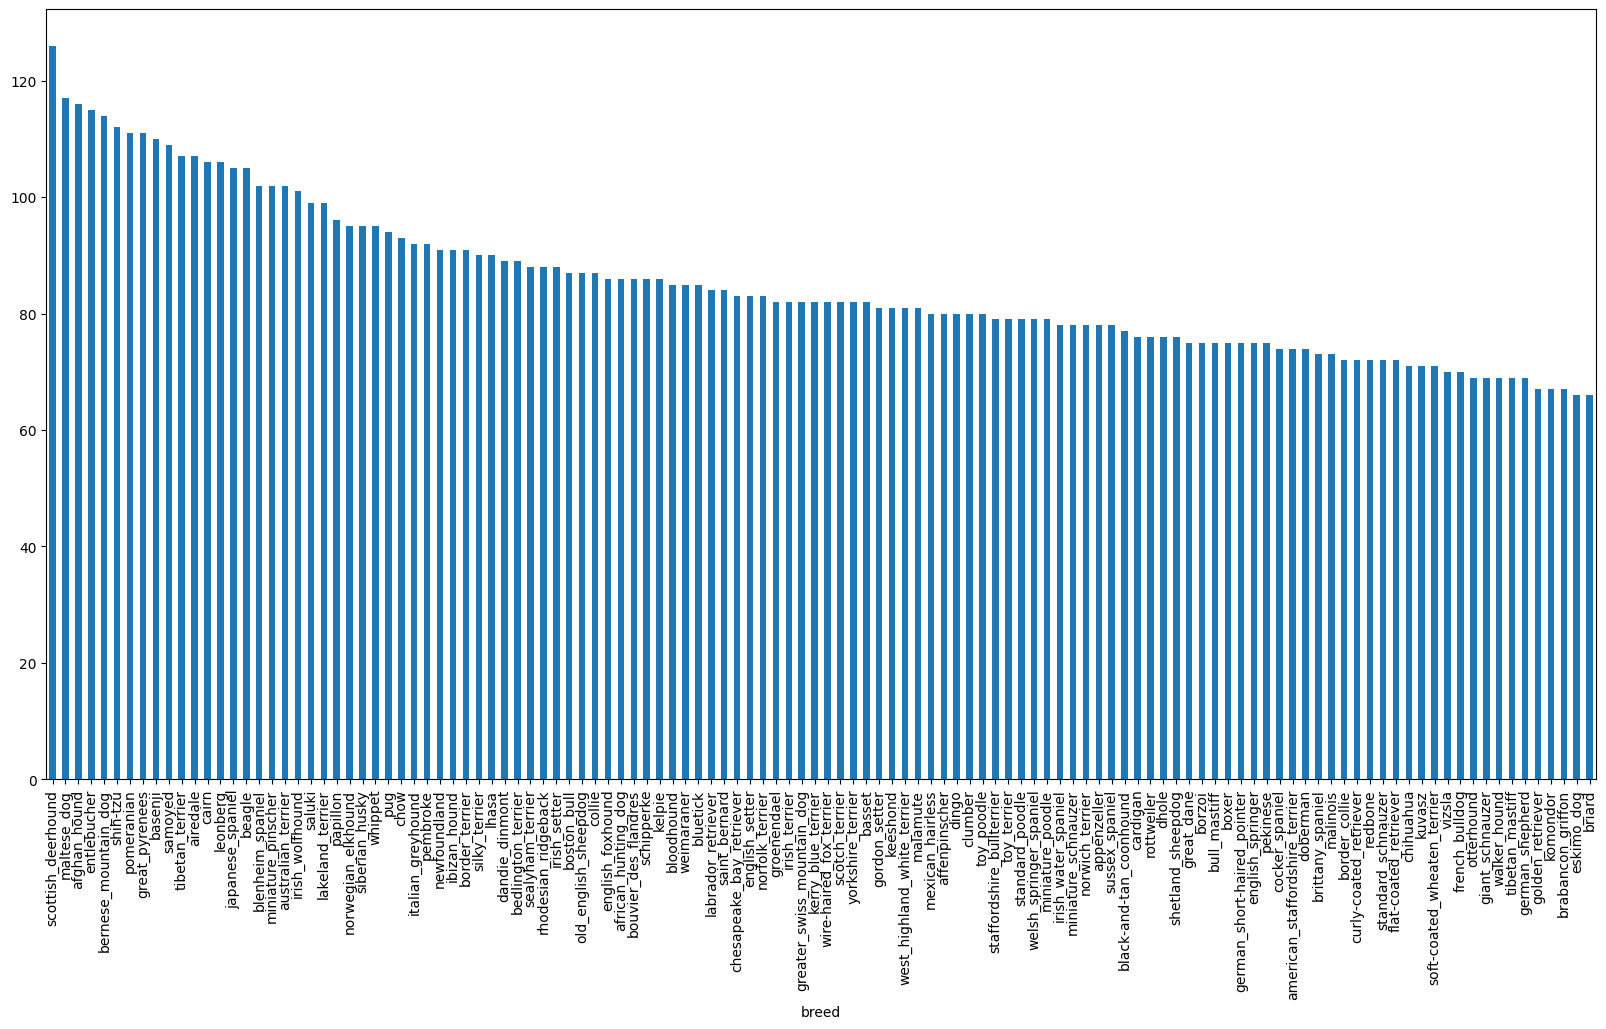

In [5]:
# Images of each breed
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

In [6]:
labels_csv['breed'].value_counts().median()

82.0

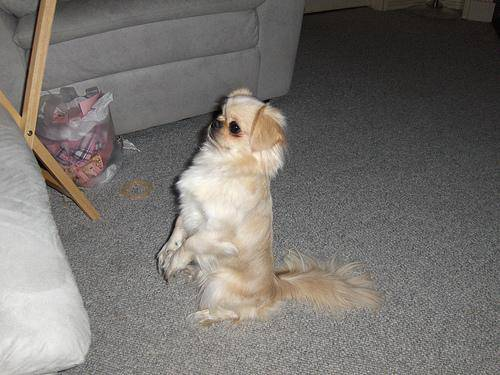

In [7]:
#Let's view an image
from IPython.display import Image
Image('drive/MyDrive/Dog-Vision/train/001cdf01b096e06d78e9e5112d419397.jpg')

### Getting images and thier labels
Path name and their labels

In [8]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [9]:
#Creating path name for each image id
filenames=['drive/MyDrive/Dog-Vision/train/'+fname+'.jpg' for fname in labels_csv['id']]
filenames[:10]

['drive/MyDrive/Dog-Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog-Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog-Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog-Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog-Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog-Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog-Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog-Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog-Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog-Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
#Check whether number of filenames matches number of actual image files
import os
if len(os.listdir('drive/MyDrive/Dog-Vision/train'))==len(filenames):
  print('Matched. Proceed!!!')
else:
  print('Mismatch')


Matched. Proceed!!!


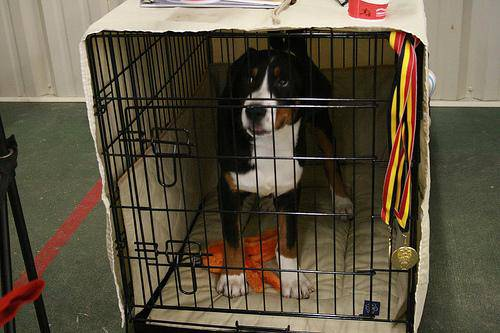

In [11]:
# One more check
Image(filenames[2201])

In [12]:
labels_csv['breed'][2001]

'black-and-tan_coonhound'

In [13]:
import numpy as np
labels=labels_csv['breed'].to_numpy()
# labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [14]:
#check if number of labels matches number of filnames
if len(labels)==len(filenames):
  print('Matched')
else:
  print('not matched')

Matched


In [15]:
#Unique label values
unique_breed=np.unique(labels)
len(unique_breed)

120

In [16]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0]==unique_breed

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [17]:
# Turning every label into boolean array
bool_arr=[]

for l in labels:
  bool_arr.append([l==unique_breed])

In [18]:
len(bool_arr)

10222

In [19]:
#converting boolean array into numpy array
bool_arr=np.array(bool_arr)

In [20]:
bool_arr[2]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]])

In [21]:
#Turning boolean into integers
print(labels[0])
print(np.where(unique_breed==labels[0]))  #index where label occurs
print(bool_arr[0].argmax()) #index where label occurs in boolean arr
print(bool_arr[0].astype(int))  #there will be a 1 where the sample occurs



boston_bull
(array([19]),)
19
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]


In [22]:
filenames[:10]

['drive/MyDrive/Dog-Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog-Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog-Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog-Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog-Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog-Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog-Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog-Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog-Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog-Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Creating our own validation dataset

In [23]:
# setup x and y variables
x=filenames
y=bool_arr


We're going to start off experimenting with ~1000 images and increase as needed

In [24]:
# set no. of images to use for experimentation
NUM_IMAGES=1000 #@param{type:"slider",min:1000,max:10000,step:100}

In [25]:
# Splitting data into train and validation sets
from sklearn.model_selection import train_test_split

#splitting them into training and validation of total size Num_images
x_train,x_val,y_train,y_val=train_test_split(x[:NUM_IMAGES],
                                             y[:NUM_IMAGES],
                                             test_size=0.2,
                                             random_state=42)
len(x_train),len(y_train),len(x_val),len(y_val)

(800, 800, 200, 200)

In [26]:
x_train[:5], y_train[:5]

(['drive/MyDrive/Dog-Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog-Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog-Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Dog-Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Dog-Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 array([[[False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False,  True,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False, False, False, False,
          False, False, False, False, False, False

## Preproceesing Images (Turning images into tensors)

To preprocess our images
1. Take an image path as input
2. User Tensorflow to read the files and save it to variable
3. turn our images into tensors
4. Normalize our image (convert color channel
4. resize the image to be a shape of (224,224)
5. return the modified image

In [27]:
# convert image to numpy array
from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape

(257, 350, 3)

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
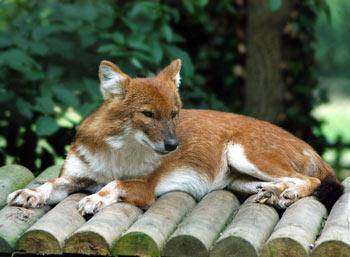

In [28]:
image

In [29]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [30]:
# define iage size
IMG_SIZE=224

# create afucntion for preprocessing img
def preprocess_image(image_path):
  """ Takes an image filepath and turns the image into tensor"""
  # read in an image file
  image=tf.io.read_file(image_path)
  # turn th jpeg image into numerical tensor
  image=tf.image.decode_jpeg(image,channels=3)
  # convert the color channel values from 0-255 to 0-1 values
  image=tf.image.convert_image_dtype(image,tf.float32)
  # resize the image
  image=tf.image.resize(image,size=(IMG_SIZE,IMG_SIZE))

  return image


## Turning our data into batches

why to convert data into batches?
all 10k + may not fit into memory.

Our bacth size is 32



In [31]:
# create a function to return a tuple (image,label)
def get_img_label(image_path,label):
  """
  Takes an image file path name and the associated label
  processes the image and returns a tuple of (image,label)
  """
  image=preprocess_image(image_path)
  return image,label

In [32]:
(preprocess_image(x[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [33]:
# define the batch size
BATCH_SIZE=32
#function to convert data into batchs
def create_data_batches(x,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  Create batches of data out of image (x) and label (y) pairs.
  Shuffles the training data but not validation data.
  Also accepts test data as input
  """
  # test data doesnt have labels
  if test_data:
    print('Creating test data batches...')
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch=data.map(preprocess_image).batch(BATCH_SIZE)
    return data_batch
  # validation data deosnt need to be shuffled
  elif valid_data:
    print('Creating val data batches...')
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                             tf.constant(y)))
    data_batch=data.map(get_img_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print('Create training data batches...')
    # turn file paths and labels into tensors
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                             tf.constant(y)))
    data=data.shuffle(buffer_size=len(x))
    data=data.map(get_img_label)
    data_batch=data.batch(BATCH_SIZE)
  return data_batch

# creating training and validation data
training_data=create_data_batches(x_train,y_train)
val_data=create_data_batches(x_val,y_val,valid_data=True)



Create training data batches...
Creating val data batches...


In [34]:
# check out the different attributes of our data batches
training_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 1, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 1, 120), dtype=tf.bool, name=None)))

## Vizualizing Data

In [35]:
import matplotlib.pyplot as plt
def show_25_images(images,labels):
  '''dispalys a plot os 25 imahegs ans their labels from data batch'''
  #setting up figure
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breed[labels[i].argmax()])
    plt.axis('off')


In [36]:
training_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 120), dtype=tf.bool, name=None))>

In [37]:
train_images,train_labels=next(training_data.as_numpy_iterator())

In [38]:
train_images,train_labels

(array([[[[3.89775932e-01, 3.50560248e-01, 3.46638680e-01],
          [3.85854363e-01, 3.46638680e-01, 3.42717111e-01],
          [3.81932795e-01, 3.42717111e-01, 3.38795543e-01],
          ...,
          [1.96978912e-01, 1.30312234e-01, 6.03542104e-02],
          [1.28903970e-01, 6.73494115e-02, 1.75595600e-02],
          [1.13497861e-01, 5.85958883e-02, 1.54586323e-02]],
 
         [[4.66902345e-01, 4.31608230e-01, 4.35529798e-01],
          [4.63007748e-01, 4.27713633e-01, 4.31635201e-01],
          [4.58771050e-01, 4.23476934e-01, 4.27398503e-01],
          ...,
          [2.03294888e-01, 1.36628211e-01, 6.66701868e-02],
          [1.15824126e-01, 5.42695709e-02, 4.47971700e-03],
          [1.00411378e-01, 4.55094054e-02, 2.38895160e-03]],
 
         [[5.16308963e-01, 4.89076853e-01, 4.95685726e-01],
          [5.13555646e-01, 4.86323535e-01, 4.92932439e-01],
          [5.09127021e-01, 4.81894910e-01, 4.88503784e-01],
          ...,
          [2.06293792e-01, 1.39627114e-01, 7.4611

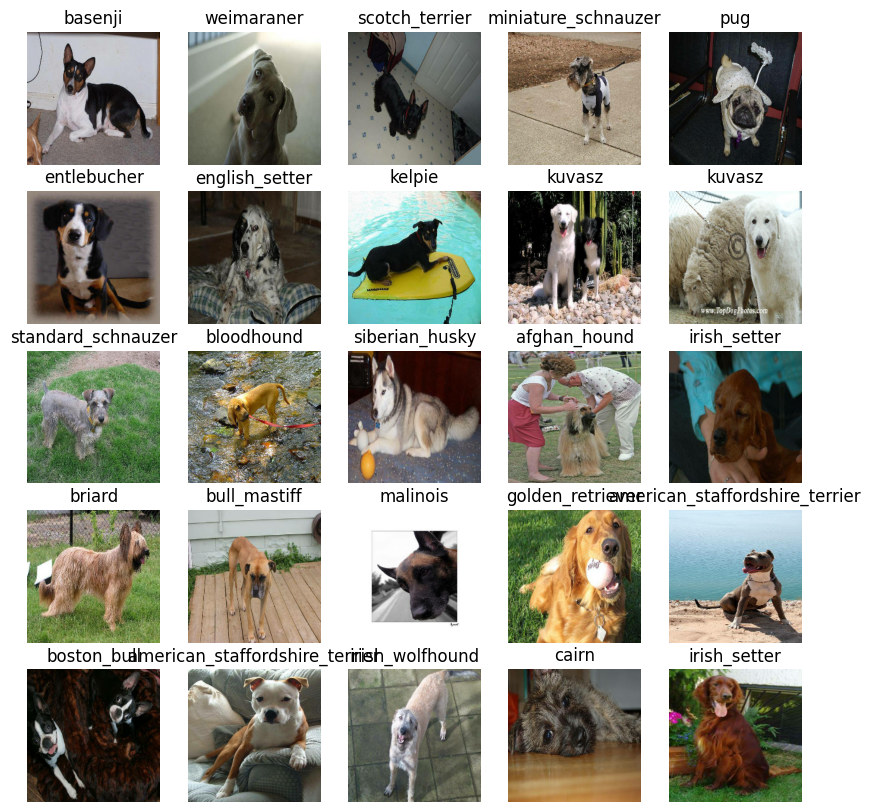

In [39]:
# now vizualize the data in training batch
show_25_images(train_images,train_labels)

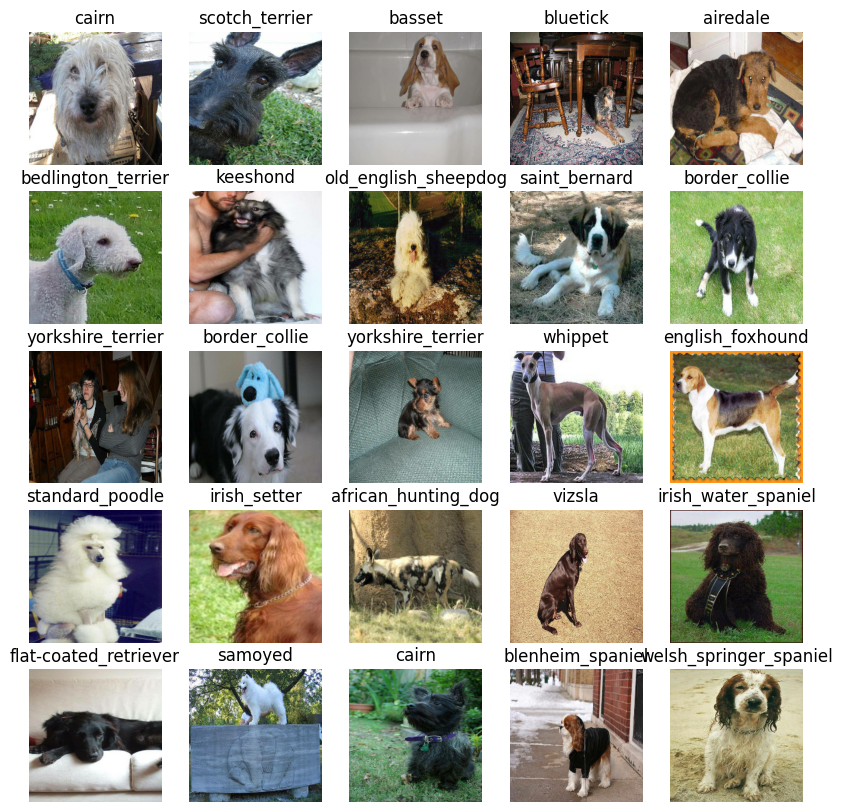

In [40]:
# now lets vizualize our validation set
val_images, val_labels=next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## Building a model
Before we build a model,there are few things we need to define
* input shape (image shape in form of tensors)
* output shape (label in form of tensors)
* url we want to use

In [41]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breed) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Let put our input,output into keras deep learning model

* Creating a function which takes input shape, output shape and model
* defining layers in keras model in sequential manner
* compiles the model
* builds the model
* return the model


In [42]:

# import tensorflow as tf
# import tensorflow_hub as hub

# def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
#     print("Building model...")
#     # Setup model layers
#     model = tf.keras.Sequential([
#         hub.KerasLayer(model_url, trainable=False, input_shape=input_shape),  # Layer 1 (Input layer)
#         tf.keras.layers.Dense(units=output_shape, activation='softmax')      # Layer 2 (Output layer)
#     ])

#     # Compile the model
#     model.compile(
#         loss=tf.keras.losses.CategoricalCrossentropy(),  # Use SparseCategoricalCrossentropy if labels are integers
#         optimizer=tf.keras.optimizers.Adam(),
#         metrics=["accuracy"]
#     )

    # return model
import tf_keras
from tf_keras.models import Sequential
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)


  model = tf_keras.Sequential([
    hub.KerasLayer(model_url),
    tf_keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax")
])
  # # Setup the model layers
  # model = tf.keras.Sequential([
  #   hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
  #   tf.keras.layers.Dense(units=OUTPUT_SHAPE,
  #                         activation="softmax") # Layer 2 (output layer)
  # ])

  # Compile the model
  model.compile(
      loss=tf_keras.losses.CategoricalCrossentropy(),
      optimizer=tf_keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"]
  )
  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting

  return model






# import tensorflow as tf
# import tensorflow_hub as hub

# def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
#     print('Building model...')

#     # Define the model
#     model = tf.keras.Sequential([
#         tf.compat.v1.keras.layers.Lambda(lambda x: hub.KerasLayer(model_url)(x), input_shape=input_shape),
#         tf.keras.layers.Dense(units=output_shape, activation='softmax')  # Output layer
#     ])

#     # Compile the model
#     model.compile(
#         loss=tf.keras.losses.CategoricalCrossentropy(),
#         optimizer=tf.keras.optimizers.Adam(),
#         metrics=['accuracy']
#     )

#     return model


In [43]:
model=create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating callbacks
* Helper functions a model can use during training to do such things as save its progress, check its progress or stops training early if model stops improving.

* We'll create two callbacks , one for TensorBoard which helps back our models progress and another for early stopping which prevents our model from training too long.

## TensorBoard Callbacks

* To setup a tensorboard callback, we need to do 3 things:
1. Load the tensorBoeard notebook extension
2. Creat a tensorboard callback which is able to save logs to a directory and pass it ti oue model's fit function.
3. Vizualize our models training logs with the %tensorboard magic function (we'll do this after model training)


In [44]:
# Load TensorBoard notebook extension
%load_ext tensorboard



In [45]:
import os
import datetime     # to access current date and time
def create_tensorboard_callback():
  # create a log directory for storing tensorboard logs
  logdir=os.path.join("drive/MyDrive/Dog-Vision/logs",
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf_keras.callbacks.TensorBoard(logdir)


### Early stopping CallBack
helps model  prevent from overfitting

In [46]:
#creating early stopping callback
early_stopping=tf_keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                patience=3)

## Training a model (on subset of data)
our first model is going to train on 1000 images to make sure everything is working


In [47]:
NUM_EPOCHS=100 #@param{type:'slider',min:10,max:100,step:10}

In [48]:
# Check to make sure we're still running in a GPU
print("GPU","Available " if tf.config.list_physical_devices("GPU") else "not available")

GPU Available 


Lets create a function which trains a model.
* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the trainingdata,validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we'd like to use
* Retrun the model

In [49]:
# Build a function to train and return a trained model
def train_model(training_data,val_data):
  """
  Trains a given model and returns the trained version.
  """
  #Create a model
  model=create_model()
  #create new tensorboard session everytime we train a model
  tensorboard=create_tensorboard_callback()
  training_data = training_data.map(lambda x, y: (x, tf.squeeze(y, axis=1)))
  val_data = val_data.map(lambda x, y: (x, tf.squeeze(y, axis=1)))
  model.fit(x=training_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  #return the fitted model
  return model


In [50]:
#fit the model to the data
model=train_model(training_data,val_data)

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 296s 12s/step - loss: 4.6526 - accuracy: 0.0712 - val_loss: 3.5257 - val_accuracy: 0.2600
Epoch 2/100
25/25 [==============================] - 4s 176ms/step - loss: 1.6903 - accuracy: 0.6687 - val_loss: 2.1769 - val_accuracy: 0.5250
Epoch 3/100
25/25 [==============================] - 4s 166ms/step - loss: 0.5742 - accuracy: 0.9350 - val_loss: 1.6608 - val_accuracy: 0.6000
Epoch 4/100
25/25 [==============================] - 6s 228ms/step - loss: 0.2563 - accuracy: 0.9900 - val_loss: 1.4741 - val_accuracy: 0.6400
Epoch 5/100
25/25 [==============================] - 4s 156ms/step - loss: 0.1511 - accuracy: 0.9962 - val_loss: 1.4037 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 4s 142ms/step - loss: 0.1029 - accuracy: 0.9975 - val_loss: 1.3615 - val_accuracy: 0.6400
Epoch 7/100
25/25 [==============================

**Overfitting Solution:**

1) Simplify the model

2) Early Stopping

3) Regularization

4) Data Augmentation

5) Dropouts

## Checking the TensorBoard Logs

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize its contents

In [ ]:
%tensorboard --logdir drive/MyDrive/Dog-Vision/logs

## Making and evaluating prediction on trained model


In [52]:
# Make prediction on the validation data (not used to train on)
predictions=model.predict(val_data,verbose=1)
# verbose - it say when prediction is made, show me your progress
predictions

7/7 [==============================] - 1s 108ms/step


array([[1.7110930e-03, 1.2883043e-04, 6.6413218e-04, ..., 2.5326546e-04,
        9.2658316e-05, 8.6946590e-03],
       [3.2355029e-03, 4.8094988e-04, 4.3191514e-03, ..., 2.7337967e-04,
        3.9444729e-03, 8.6581829e-05],
       [4.5741719e-05, 1.6500537e-03, 3.0684131e-04, ..., 7.5417547e-04,
        1.6742655e-04, 7.7792042e-04],
       ...,
       [5.2177711e-06, 1.6671998e-05, 2.4179501e-05, ..., 3.7057893e-05,
        1.1285976e-04, 1.7827324e-04],
       [7.0471701e-04, 1.1343748e-04, 6.8353882e-05, ..., 2.9395483e-04,
        5.9407557e-05, 1.4106449e-03],
       [9.9213480e-04, 9.2903501e-05, 2.9860982e-03, ..., 6.2207147e-03,
        2.6135568e-03, 1.8882460e-04]], dtype=float32)

In [53]:
max(predictions[0])

0.29653817

In [54]:
predictions[0]

array([1.71109301e-03, 1.28830434e-04, 6.64132182e-04, 1.29951004e-04,
       6.51391398e-04, 6.03998933e-06, 2.96851303e-02, 1.30492219e-04,
       1.56021095e-03, 9.36911965e-05, 4.82365809e-04, 7.32094515e-04,
       2.72469653e-04, 4.72563697e-05, 4.87388083e-04, 2.76244245e-04,
       1.76364520e-05, 2.96538174e-01, 1.52374805e-05, 1.52146968e-04,
       6.57180615e-04, 1.91049476e-04, 4.21837212e-05, 2.14071316e-03,
       3.67586435e-05, 1.01513811e-04, 2.29840726e-01, 3.64312204e-04,
       2.02931114e-04, 4.52540029e-04, 2.04287746e-04, 2.10090511e-04,
       1.50410910e-04, 8.22445782e-06, 3.81297396e-05, 2.62154918e-02,
       5.64269030e-05, 1.89849481e-04, 7.25337813e-05, 1.04375154e-04,
       2.04420462e-03, 2.26772518e-05, 2.29135883e-04, 1.70381507e-04,
       2.26701577e-05, 2.08068697e-04, 1.69243911e-04, 9.91698034e-05,
       5.23159397e-04, 4.09830536e-04, 8.07067670e-04, 8.16984175e-05,
       5.12368046e-04, 8.50997603e-05, 2.20187561e-04, 7.15158312e-05,
      

In [55]:
# first prediction
index=7
print(predictions[index])
print(f'Max value(probability of predictions):{np.max(predictions[index])}')
print(f'Sum {np.sum(predictions[index])}')
print(f'Max index: {np.argmax(predictions[index])}')
print(f'Prediction Label:{unique_breed[np.argmax(predictions[index])]}')

[1.41139899e-03 5.46902127e-04 1.41616292e-05 3.51444760e-04
 1.56087481e-04 5.05284006e-05 1.52877503e-04 1.25916078e-04
 4.55367735e-05 4.47604289e-05 3.80588672e-03 5.78480067e-05
 6.21236950e-06 1.65467805e-04 1.56384587e-04 1.87350146e-04
 6.16645702e-05 1.03052866e-04 6.36165496e-05 9.70257133e-06
 3.09187779e-03 5.14010062e-05 5.99535906e-06 1.25977593e-02
 5.88990661e-05 1.72920947e-04 4.66037745e-04 6.39677528e-05
 1.17495932e-04 1.38126297e-05 2.81232606e-05 1.26725517e-03
 8.56461775e-05 6.02013060e-05 6.21749423e-05 4.47787531e-03
 3.02784656e-06 3.98126103e-05 2.21277063e-04 1.27985128e-04
 4.27434017e-04 6.61329841e-06 1.94264736e-04 6.17985846e-04
 3.04789610e-05 2.50675075e-05 4.03685153e-05 3.32541167e-05
 8.46878858e-04 1.36558287e-04 1.86214936e-06 2.64788887e-05
 1.10970298e-03 7.61730989e-05 1.96088295e-04 1.04422565e-04
 1.83972552e-05 3.78096811e-05 4.06967702e-05 7.97261298e-03
 5.25004725e-06 6.73636459e-05 1.09561195e-03 6.26002220e-05
 1.05082442e-03 4.998189

* Above values are confidence intervals
* Making it more vizualized

In [56]:
# Turn probabilities into their respective label
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probablities into a label
  """
  return unique_breed[np.argmax(prediction_probabilities)]
pred_label=get_pred_label(predictions[8])
pred_label

'saint_bernard'

Since our dataset is in batch format, we'll have to unbatch it to make predictions on the validation images and then compare those predictions to the validation labels (turn labels).

In [57]:
# create a function to unbatch
def unbatchify(data):
  """ Takes a batched dataset of (images,label) Tensors and return seperate arrays of images and labels"""
  images_=[]
  labels_=[]
  for image,label in data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(unique_breed[np.argmax(label)])
  return images_,labels_
val_images,val_labels=unbatchify(val_data)
val_images[20],val_labels[20]


(array([[[0.66187024, 0.6148114 , 0.5520663 ],
         [0.6441622 , 0.59710336, 0.53435826],
         [0.6536829 , 0.60662407, 0.543879  ],
         ...,
         [0.87403595, 0.87403595, 0.8426634 ],
         [0.87300426, 0.87300426, 0.8416317 ],
         [0.8754202 , 0.8754202 , 0.84404767]],
 
        [[0.6497651 , 0.60270625, 0.53996116],
         [0.66612184, 0.619063  , 0.5563179 ],
         [0.6575595 , 0.6105007 , 0.5477556 ],
         ...,
         [0.88299215, 0.88299215, 0.8516196 ],
         [0.88955724, 0.88955724, 0.8581847 ],
         [0.89664817, 0.89664817, 0.8652756 ]],
 
        [[0.65102184, 0.603963  , 0.5412179 ],
         [0.65498954, 0.6079307 , 0.5451856 ],
         [0.65533096, 0.60827214, 0.54552704],
         ...,
         [0.8910162 , 0.8913313 , 0.85995877],
         [0.89379907, 0.8941142 , 0.86274165],
         [0.89979994, 0.9001151 , 0.8687425 ]],
 
        ...,
 
        [[0.77584046, 0.77584046, 0.7679973 ],
         [0.7797253 , 0.7797253 , 0.77188

We have got ways to get
* prediction labels
* Validation Labels
* Validation images

Lets make it more visual

We will create a function which :
* Takes an array of prediction probabilities an array of truth labels and an array of images and integers.
* Convert the predicted probabilities into predicted labels
* Plot the predicted label, its predicted probability, the truth label and the target image


In [58]:
def plot_pred(prediction_probabilities, labels,images, n=7):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob,true_label,image=prediction_probabilities[n],labels[n],images[n]
  # get pred label
  pred_label=get_pred_label(pred_prob)
  #plot images and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  if pred_label==true_label:
    color='green'
  else:
    color='red'

  plt.title("{} {:2.0f}% {}".format(pred_label,np.max(pred_prob*100),true_label),color=color)

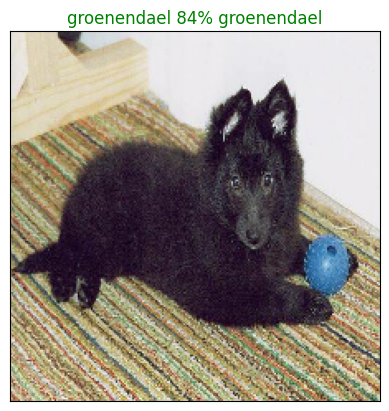

In [59]:
plot_pred(predictions,val_labels,val_images,n=77)

Now we have got a function to visualise our models top prediction, lets make another which makes top 10 predictions

This Function will:
* Take an input of prediction probablities and a ground truth and an integer
*Find the prediction using `get_pred_label()`
* Find the top 10 :    
  * prediction_probablitlies indexes
  * prediction probablities values
  * prediction labels
* plot the top 10 prediction probablity values and labels, green-truth label


In [60]:
def plot_pred_conf(prediction_probabilities,labels,n=1):
  """Plot the top 10 highest prediction confidences along with truth label for sample n"""
  pred_prob,true_label=prediction_probabilities[n],labels[n]
  # get the predicted label
  pred_label=get_pred_label(pred_prob)
  #find top 10 prediction confidence indexes
  top_10_pred_indexes=pred_prob.argsort()[-10:][::-1]
  # find top 10 prediction confidence interval
  top_10_predictions_values=pred_prob[top_10_pred_indexes]
  # find top 10 prediction label
  top_10_pred_labels=unique_breed[top_10_pred_indexes]
  # setup a plot
  top_plot=plt.bar(np.arange(len(top_10_pred_labels)),
                   top_10_predictions_values,
                   color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
                       labels=top_10_pred_labels,
                       rotation='vertical')
  # Changing the color of true values
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color('green')
  for i, label in enumerate(top_10_pred_labels):
    if label == true_label:
        # True label bar should be green
        top_plot[i].set_color('green')
    elif label == pred_label:
        # Predicted label bar should be orange if it's not the true label
        top_plot[i].set_color('orange')

  else:
    pass




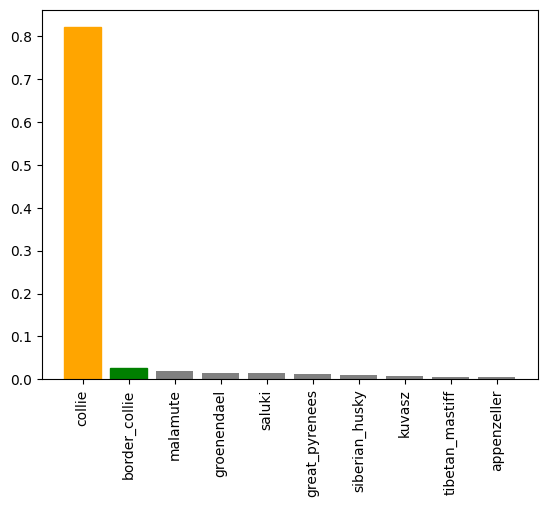

In [61]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we've got some functions to help us visualize our predictions and evaluate our model

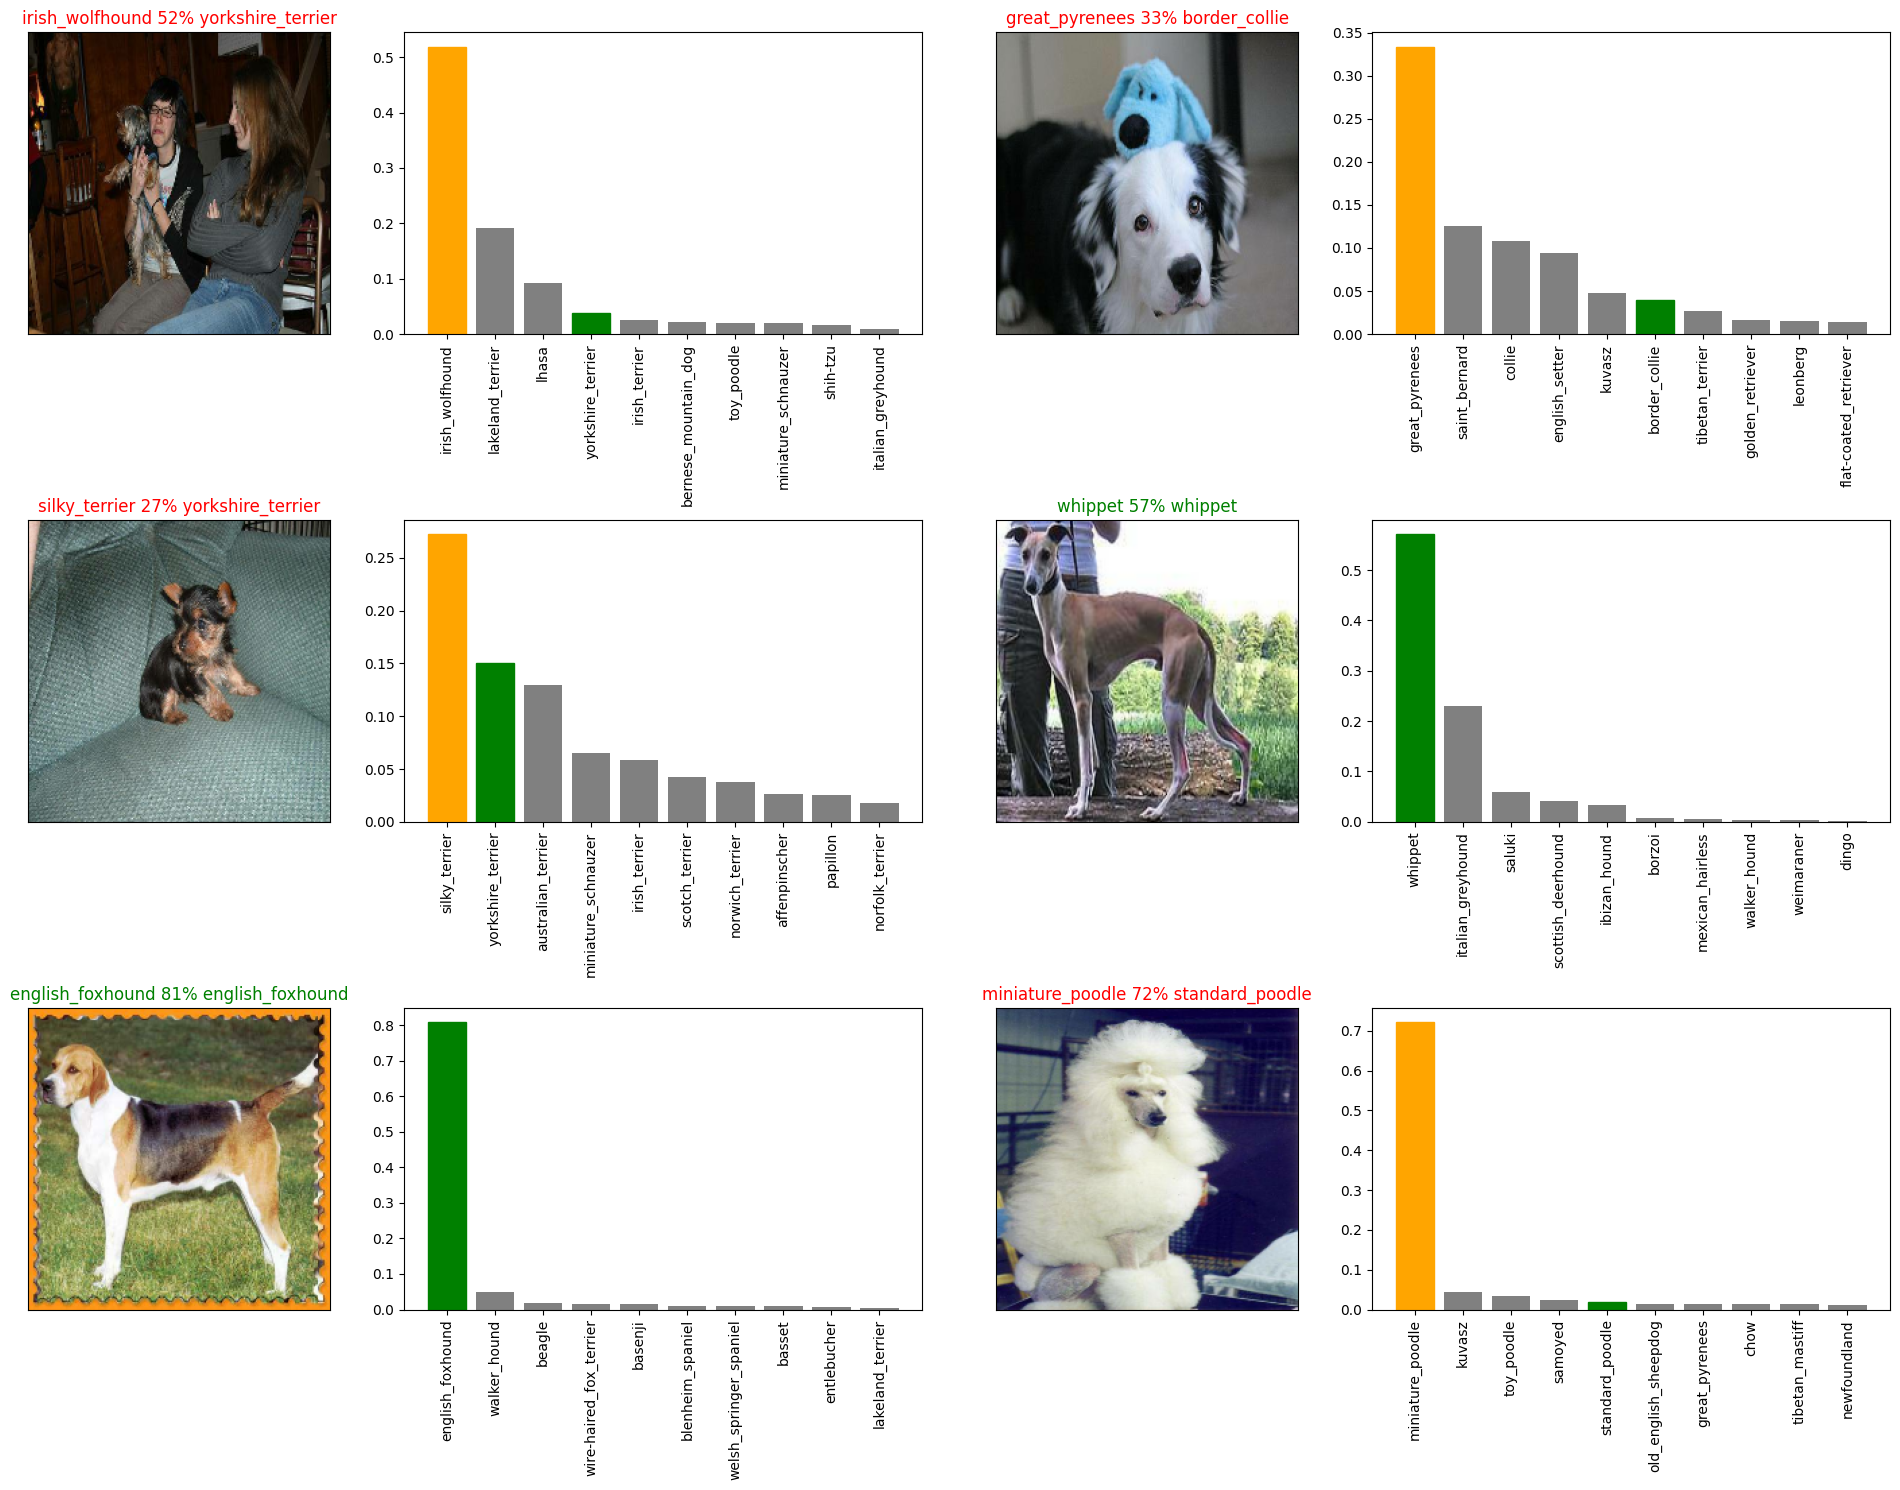

In [62]:
# Lets check out few prediction and and thier different values
i_multiplier=10
num_rows=3
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
  plt.tight_layout(h_pad=1.0)
plt.show()

How to create confusion matrix with our model's prediction and true label.

# Saving and reloading our model.


In [63]:
def save_model(model,suffix=None):
  """Saves a given model in models dictionary and appends a suffix string"""
  # create a model directory
  modeldir=os.path.join("drive/MyDrive/drive/Dog-Vision/Models",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path=modeldir+'-'+suffix+".h5"
  print(f"Saving model {model_path}....")
  model.save(model_path)
  return model_path


In [64]:
# Create a function to load our model
def load_model(model_path):
  """ load the saved model from its specific patha"""
  print(f"Loading our model: {model_path}")
  model=tf_keras.models.load_model(model_path,
                                   custom_objects={"KerasLayer":hub.KerasLayer})
  return model

now we've got functions to savea nd load the model.

In [65]:
#save our model trained on 1000 images
save_model(model,suffix="1000-images mobilenetv2-Adam")


Saving model drive/MyDrive/drive/Dog-Vision/Models/20241206-05321733463143-1000-images mobilenetv2-Adam.h5....


/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/MyDrive/drive/Dog-Vision/Models/20241206-05321733463143-1000-images mobilenetv2-Adam.h5'

In [66]:
#loading the model
images_trained_model=load_model('drive/MyDrive/drive/Dog-Vision/Models/20241202-05231733117019-1000-images mobilenetv2-Adam.h5')

Loading our model: drive/MyDrive/drive/Dog-Vision/Models/20241202-05231733117019-1000-images mobilenetv2-Adam.h5


In [67]:
input_shape=images_trained_model.input_shape[1:]
def reshape_data(image,label):
  """ Reshape the image to expected image shape."""
  reshaped_image=tf.image.resize(image,input_shape[:2])
  squeezed_label = tf.squeeze(label, axis=1)
  return reshaped_image, squeezed_label

val_data=val_data.map(reshape_data)


In [68]:
# Evaluate the post saved model
images_trained_model.evaluate(val_data)

7/7 [==============================] - 2s 152ms/step - loss: 1.2098 - accuracy: 0.6750


[1.2097502946853638, 0.675000011920929]

In [69]:
#evaluate the pre saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 172ms/step - loss: 1.3374 - accuracy: 0.6400


[1.3373680114746094, 0.6399999856948853]

#Training a big dog model on full data

In [70]:
len(x),len(y)

(10222, 10222)

In [71]:
y = tf.reshape(y, (10222, 1, 120))
y = tf.squeeze(y, axis=1)
#create a data batch with full data
full_data=create_data_batches(x,y)

Create training data batches...


In [72]:

# create model with full model
full_model=create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [73]:
# create full model callbacks
full_model_tensorboard=create_tensorboard_callback()
# No validation set when training on all the data , so we cant monitor validation accuracy
full_model_eraly_stopping=tf_keras.callbacks.EarlyStopping(monitor='accuracy',
                                                           patience=3)

**Note:**
Running the below cell will take a little while (maybe upto 30 mins for first epoch) because the GPU we're using  in runtime has to load all of the images into memory.

In [74]:
#fit the full model to full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_eraly_stopping])

Epoch 1/100
320/320 [==============================] - 47s 136ms/step - loss: 1.3394 - accuracy: 0.6710
Epoch 2/100
320/320 [==============================] - 41s 130ms/step - loss: 0.3955 - accuracy: 0.8864
Epoch 3/100
320/320 [==============================] - 41s 127ms/step - loss: 0.2354 - accuracy: 0.9352
Epoch 4/100
320/320 [==============================] - 55s 171ms/step - loss: 0.1526 - accuracy: 0.9653
Epoch 5/100
320/320 [==============================] - 42s 132ms/step - loss: 0.1054 - accuracy: 0.9806
Epoch 6/100
320/320 [==============================] - 45s 142ms/step - loss: 0.0770 - accuracy: 0.9879
Epoch 7/100
320/320 [==============================] - 48s 149ms/step - loss: 0.0595 - accuracy: 0.9911
Epoch 8/100
320/320 [==============================] - 45s 140ms/step - loss: 0.0460 - accuracy: 0.9943
Epoch 9/100
320/320 [==============================] - 44s 138ms/step - loss: 0.0364 - accuracy: 0.9964
Epoch 10/100
320/320 [==============================] - 43s 135m

In [75]:
# saving model to drive
save_model(full_model,suffix='Full-image-set-mobilenetv2-adam')

Saving model drive/MyDrive/drive/Dog-Vision/Models/20241206-06001733464849-Full-image-set-mobilenetv2-adam.h5....


'drive/MyDrive/drive/Dog-Vision/Models/20241206-06001733464849-Full-image-set-mobilenetv2-adam.h5'

In [77]:
loaded_full_model=load_model('drive/MyDrive/drive/Dog-Vision/Models/20241206-06001733464849-Full-image-set-mobilenetv2-adam.h5')

Loading our model: drive/MyDrive/drive/Dog-Vision/Models/20241206-06001733464849-Full-image-set-mobilenetv2-adam.h5


## Making predictions on test dataset
Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into tensor format.

To make predictions on the test data, we'll:
* get the test image filenames
* convert the filnames into test data batches using `create_data_batches()` and setting the test `test_data` parameter to `True` (since the test data doesn't have labels).
* Make a predictions array by passing the test batches to the `predict()` method called on our model

In [81]:
# Load test image filnames
test_path='drive/MyDrive/Dog-Vision/test/'
test_filenames=[test_path+fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/Dog-Vision/test/e2a6dfb8127f801af0626f245f35441e.jpg',
 'drive/MyDrive/Dog-Vision/test/e0e3eb01e80b1d694a47b23909e158ec.jpg',
 'drive/MyDrive/Dog-Vision/test/dcb6ce994241db517c1ebe42897db826.jpg',
 'drive/MyDrive/Dog-Vision/test/e3ff13afe2400a95e3ab76759d94fbc4.jpg',
 'drive/MyDrive/Dog-Vision/test/de172eece3080506aa3bcf1967f4a90b.jpg',
 'drive/MyDrive/Dog-Vision/test/e59d59ffbb65d9eae166d4068af5d9b9.jpg',
 'drive/MyDrive/Dog-Vision/test/dd703c7beeaf5cba5533d5f42b608f2e.jpg',
 'drive/MyDrive/Dog-Vision/test/e246de79e4efd1145698d9c21466bbaf.jpg',
 'drive/MyDrive/Dog-Vision/test/dd026c42cfd91ea64b1fe5db04a18863.jpg',
 'drive/MyDrive/Dog-Vision/test/e004d9f3a6236e2de6dd0f386b685059.jpg']

In [82]:
test_data=create_data_batches(test_filenames,test_data=True)

Creating test data batches...


**Note:** calling `predict()` on our full model and passing it the test data batch will take long time

In [83]:
# make prediction on test data batch using the loaded full model
test_predictions=loaded_full_model.predict(test_data,verbose=1)

324/324 [==============================] - 354s 1s/step


In [87]:
# save predictions (Numpy array) to csv file (for access later)
np.savetxt('drive/MyDrive/Dog-Vision/pred_array.csv',test_predictions,delimiter=',')

In [89]:
test_predictions=np.loadtxt("drive/MyDrive/Dog-Vision/pred_array.csv",delimiter=',')
test_predictions[:10]

array([[2.59506390e-08, 5.79234838e-05, 2.99111597e-10, ...,
        2.32116986e-06, 2.47774556e-01, 3.42220810e-05],
       [3.66203262e-10, 1.06411585e-06, 3.89385163e-10, ...,
        3.58288652e-08, 1.86685736e-11, 3.78256121e-10],
       [1.04625861e-03, 7.44327190e-06, 2.73475744e-05, ...,
        2.47303973e-07, 2.27515318e-09, 1.48990342e-09],
       ...,
       [1.32573827e-08, 2.11558745e-05, 2.15703744e-09, ...,
        7.85292741e-07, 4.00291185e-07, 5.82029500e-08],
       [1.99533342e-13, 1.45611312e-09, 5.97304206e-09, ...,
        1.23812870e-11, 2.82868573e-09, 1.95572985e-12],
       [6.92543335e-06, 2.41319441e-07, 2.43666667e-11, ...,
        6.23198721e-05, 1.32639122e-10, 5.57384340e-07]])

In [90]:
test_predictions.shape

(10357, 120)

## Test dataset predictions
Outputs model prediction probability outputs in a DataFrame with ID and columns for each different dog breed

* create a pandas dataframe with an id column as well as a column for each dog breed.
* add data to the id column by extracting the test image ID's from their filepaths
* add data (prediction probablities) to each of the dog breed columns
* and export the dataframe as csv.

In [91]:
# create a pandas data frame
preds_df=pd.DataFrame(columns=['id']+list(unique_breed))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [95]:
test_ids=[os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df['id']=test_ids

In [96]:
preds_df

id affenpinscher afghan_hound  \
0      e2a6dfb8127f801af0626f245f35441e           NaN          NaN   
1      e0e3eb01e80b1d694a47b23909e158ec           NaN          NaN   
2      dcb6ce994241db517c1ebe42897db826           NaN          NaN   
3      e3ff13afe2400a95e3ab76759d94fbc4           NaN          NaN   
4      de172eece3080506aa3bcf1967f4a90b           NaN          NaN   
...                                 ...           ...          ...   
10352  088463756041ddbc5f9b905b6ed9a940           NaN          NaN   
10353  07f36df95c5fc473f2fbf51c0929ee7d           NaN          NaN   
10354  092b3603e559d05e09e226b56bf5f788           NaN          NaN   
10355  07d94fdf5371753b114f7ce7505d0fe2           NaN          NaN   
10356  08680f416f6cf8ab00fcdf51c217b5f7           NaN          NaN   

      african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                     NaN      NaN                            NaN         NaN   
1                     NaN      NaN                            NaN         NaN   
2                     NaN      NaN                            NaN         NaN   
3                     NaN      NaN                            NaN         NaN   
4                     NaN      NaN                            NaN         NaN   
...                   ...      ...                            ...         ...   
10352                 NaN      NaN                            NaN         NaN   
10353                 NaN      NaN                            NaN         NaN   
10354                 NaN      NaN                            NaN         NaN   
10355                 NaN      NaN                            NaN         NaN   
10356                 NaN      NaN                            NaN         NaN   

      australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                    NaN     NaN    NaN  ...        NaN         NaN    NaN   
...                  ...     ...    ...  ...        ...         ...    ...   
10352                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10353                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10354                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10355                NaN     NaN    NaN  ...        NaN         NaN    NaN   
10356                NaN     NaN    NaN  ...        NaN         NaN    NaN   

      walker_hound weimaraner welsh_springer_spaniel  \
0              NaN        NaN                    NaN   
1              NaN        NaN                    NaN   
2              NaN        NaN                    NaN   
3              NaN        NaN                    NaN   
4              NaN        NaN                    NaN   
...            ...        ...                    ...   
10352          NaN        NaN                    NaN   
10353          NaN        NaN                    NaN   
10354          NaN        NaN                    NaN   
10355          NaN        NaN                    NaN   
10356          NaN        NaN                    NaN   

      west_highland_white_terrier whippet wire-haired_fox_terrier  \
0                             NaN     NaN                     NaN   
1                             NaN     NaN                     NaN   
2                             NaN     NaN                     NaN   
3                             NaN     NaN                     NaN   
4                             NaN     NaN                     NaN   
...                           ...     ...                     ...   
10352                         NaN     NaN                     NaN   
10353                         NaN     NaN                    

In [97]:
# add the prediction probablities to each dog breed column
preds_df[list(unique_breed)]=test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  e2a6dfb8127f801af0626f245f35441e   2.595064e-08  5.792348e-05   
1  e0e3eb01e80b1d694a47b23909e158ec   3.662033e-10  1.064116e-06   
2  dcb6ce994241db517c1ebe42897db826   1.046259e-03  7.443272e-06   
3  e3ff13afe2400a95e3ab76759d94fbc4   1.056383e-10  2.680822e-09   
4  de172eece3080506aa3bcf1967f4a90b   1.178582e-11  7.500635e-07   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         2.991116e-10  2.925284e-06                    2.100704e-07   
1         3.893852e-10  4.399586e-11                    5.079806e-11   
2         2.734757e-05  1.637195e-06                    3.961814e-06   
3         5.872779e-13  1.973024e-12                    2.062494e-10   
4         2.333865e-12  1.432769e-11                    9.006137e-11   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  1.317851e-08        7.850085e-07  9.718015e-05  2.019701e-08  ...   
1  8.722284e-10        2.307713e-10  1.889729e-10  1.574963e-11  ...   
2  2.114543e-05        5.835509e-06  3.735540e-10  2.614473e-09  ...   
3  7.903814e-14        3.793735e-12  5.705848e-11  1.157083e-12  ...   
4  5.879922e-14        6.829129e-12  3.297720e-11  2.253125e-08  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  1.173423e-06  9.393009e-07  6.447195e-08  2.346405e-05  2.268554e-05   
1  1.175697e-07  6.569584e-11  1.583526e-11  1.665427e-09  8.161112e-08   
2  4.176044e-05  4.292184e-09  1.179765e-08  1.479806e-06  1.462329e-06   
3  3.214730e-07  2.843177e-11  1.057745e-11  9.942368e-10  3.611620e-09   
4  6.943413e-07  4.336292e-11  1.807368e-09  5.242920e-12  5.907272e-10   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            6.567222e-05                 6.253013e-03  2.321170e-06   
1            4.438975e-11                 4.740356e-12  3.582887e-08   
2            3.610060e-14                 6.602684e-07  2.473040e-07   
3            5.588900e-13                 1.049051e-11  3.982563e-12   
4            1.535226e-06                 3.235870e-09  7.106251e-12   

   wire-haired_fox_terrier  yorkshire_terrier  
0             2.477746e-01       3.422208e-05  
1             1.866857e-11       3.782561e-10  
2             2.275153e-09       1.489903e-09  
3             3.170830e-12       6.198656e-13  
4             3.566835e-11       2.085067e-09  

[5 rows x 121 columns]

In [98]:
#save our prediction model to csv
preds_df.to_csv('drive/MyDrive/Dog-Vision/full_model_predictions_submission_1_mobilenetv2.csv',index=False)

# Making predictions on our custom data
To make prediction on custom images
* get the filepaths of our own images
* turn file paths into data batches using `create_data_batches()`. and since our custom images won't have labels , we set the `test_data` parameter to `True`
* pass the custom image data batch to our model's `predict()` method
* convert the predictions output probabilites to prediction labels
* compare the predicted labels to the custom images

In [99]:
# get cutom image path
custom_path='drive/MyDrive/Dog-Vision/custom/'
custom_image_paths=[custom_path+fname for fname in os.listdir(custom_path)]

In [100]:
custom_image_paths

['drive/MyDrive/Dog-Vision/custom/Top 10 Shedless Dogs Breeds.jpeg',
 'drive/MyDrive/Dog-Vision/custom/Watch These 7 Golden Retrievers Who Love Doing Chores [VIDEOS].jpeg',
 'drive/MyDrive/Dog-Vision/custom/Pomsky - 12 Surprising Facts About Pomeranian Husky Mix.jpeg']

In [101]:
# turn custom images into batch dataset
custom_data=create_data_batches(custom_image_paths,test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [102]:
# make predictions on custom data
custom_preds=loaded_full_model.predict(custom_data)

1/1 [==============================] - 1s 892ms/step


In [103]:
custom_preds.shape

(3, 120)

In [105]:
custom_pred_label=[get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_label

['toy_poodle', 'golden_retriever', 'siberian_husky']

In [106]:
# get custom images
custom_images=[]
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)


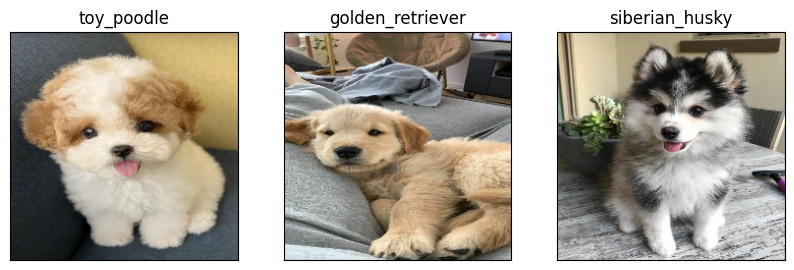

In [108]:
#check custom images
plt.figure(figsize=(10,10))
for i,image in enumerate(custom_images):
  plt.subplot(1,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_label[i])
  plt.imshow(image)
